Found 540 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


/home/nazmulhasan77/miniconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         4,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,026 (23.54 KB)

 Trainable params: 6,026 (23.54 KB)

 Non-trainable params: 0 (0.00 B)

/home/nazmulhasan77/miniconda3/envs/tf_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 293ms/step - accuracy: 0.5296 - loss: 0.6881 - val_accuracy: 0.5522 - val_loss: 0.6808
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.6556 - loss: 0.6490 - val_accuracy: 0.6567 - val_loss: 0.6298
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - accuracy: 0.8278 - loss: 0.4688 - val_accuracy: 0.8358 - val_loss: 0.4700
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 269ms/step - accuracy: 0.9074 - loss: 0.2933 - val_accuracy: 0.9104 - val_loss: 0.3356
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 15s 447ms/step - accuracy: 0.9389 - loss: 0.2082 - val_accuracy: 0.8881 - val_loss: 0.2900
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.9852 - loss: 0.1153 - val_accuracy: 0.9552 - val_loss: 0.2310
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - accuracy: 0.9889 - loss: 0.0743 - val_accuracy: 0.9851 - val_loss: 0.1502
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - accuracy: 0.9963 - loss: 0.0497 - val_accuracy:

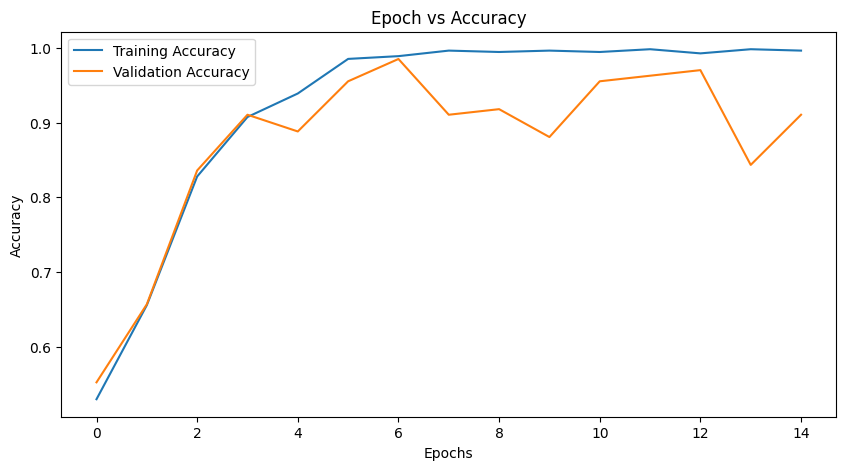

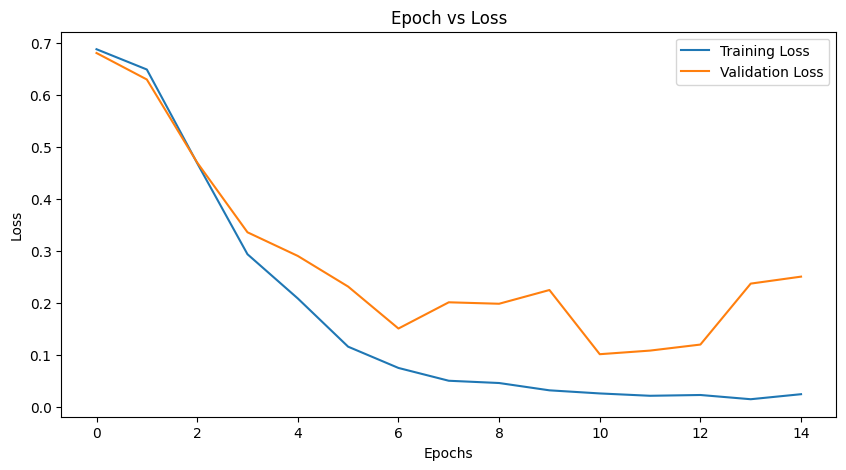

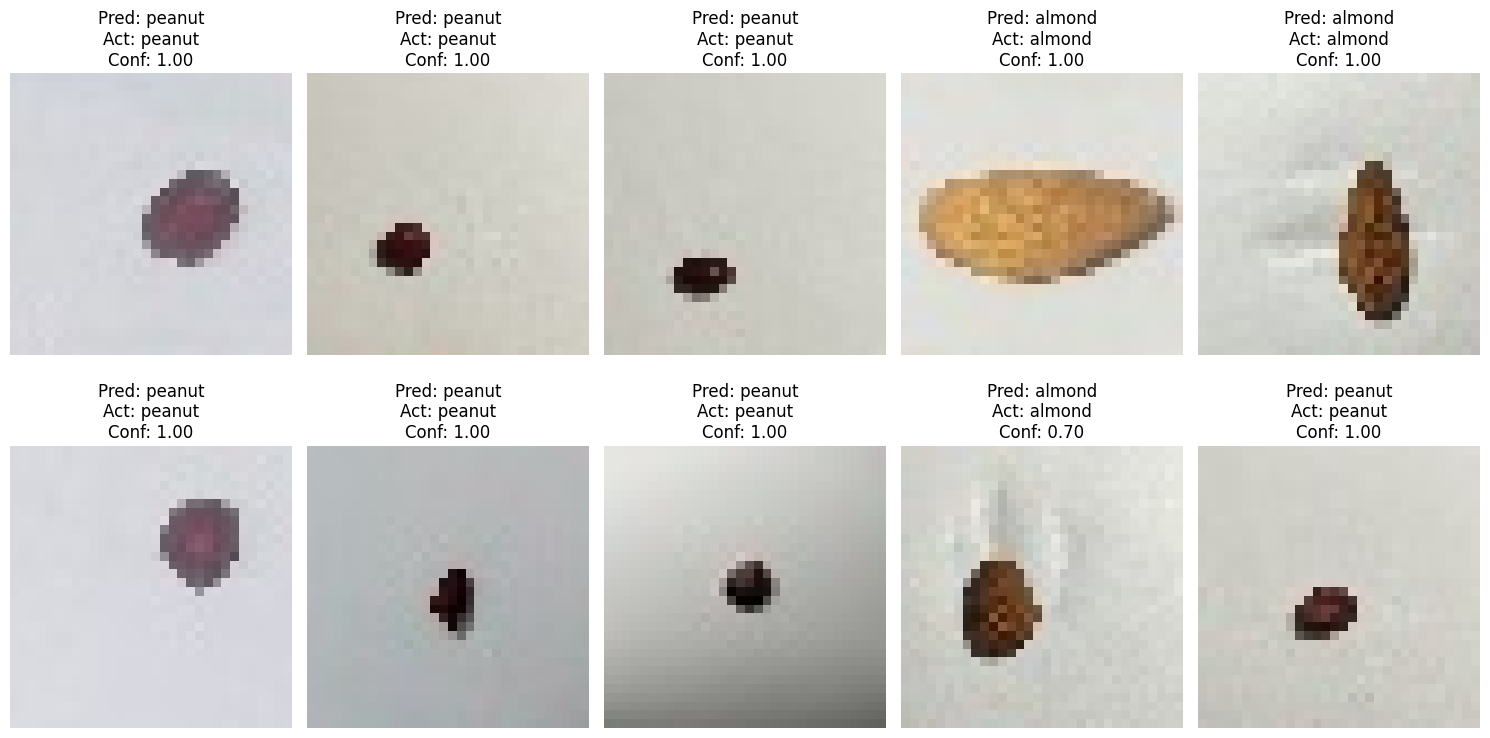


� Correct Predictions: 10/10 (100%)

� Model saved as 'almond_peanut_cnn_model_maged.h5'


In [2]:
# ==============================
# Almond vs Peanut CNN Classifier
# ==============================

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os, time, random
from tensorflow.keras.preprocessing import image

# ==============================
# 1️⃣ Dataset Directories
# ==============================
train_dir = 'data/train'  # contains 'almond/' and 'peanut/' subfolders
test_dir = 'data/test'

# ==============================
# 2️⃣ Data Preprocessing & Augmentation
# ==============================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=16,
    subset='training',
    class_mode='categorical'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=16,
    subset='validation',
    class_mode='categorical'
)

# ==============================
# 3️⃣ CNN Model Definition
# ==============================
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ==============================
# 4️⃣ Training the Model
# ==============================
start_time = time.time()
history = model.fit(train_gen, epochs=15, validation_data=val_gen)
train_time = time.time() - start_time
print(f"\n✅ Training completed in {train_time:.2f} seconds.\n")

# ==============================
# 5️⃣ Testing the Model
# ==============================
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

start_test = time.time()
test_loss, test_acc = model.evaluate(test_gen)
test_time = time.time() - start_test

print(f"\n� Testing time: {test_time:.2f} seconds")
print(f"� Test Accuracy: {test_acc*100:.2f}%\n")

# ==============================
# 6️⃣ Plot Accuracy & Loss Curves
# ==============================
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Epoch vs Accuracy')
plt.savefig("Epoch vs Accuracy.png")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Epoch vs Loss')
plt.savefig("epoch_vs_loss.png")
plt.show()

# ==============================
# 7️⃣ Predict 10 Random Test Images
# ==============================
class_labels = list(test_gen.class_indices.keys())

# Collect all image file paths from test directory
all_test_images = []
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        all_test_images += [os.path.join(class_path, fname) for fname in os.listdir(class_path)]

# Pick 10 random images
sample_images = random.sample(all_test_images, 10)

plt.figure(figsize=(15, 8))
correct = 0

for i, img_path in enumerate(sample_images):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict
    pred = model.predict(img_array, verbose=0)
    predicted_class = class_labels[np.argmax(pred)]
    confidence = np.max(pred)
    
    # Get actual class
    actual_class = os.path.basename(os.path.dirname(img_path))
    if predicted_class == actual_class:
        correct += 1
    
    # Display
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Pred: {predicted_class}\nAct: {actual_class}\nConf: {confidence:.2f}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\n� Correct Predictions: {correct}/10 ({correct*10}%)")

# ==============================
# 8️⃣ Save Model
# ==============================
model.save("almond_peanut_cnn_model_marged.h5")
print("\n� Model saved as 'almond_peanut_cnn_model_maged.h5'")


## � **CNN-Based Almond vs Peanut Image Classification**

### **1. Introduction**

This experiment focuses on developing a **Convolutional Neural Network (CNN)** to classify images of *almonds* and *peanuts*. All images were captured using mobile phones (e.g., *iPhone 12 Pro Max*) by team members under similar lighting conditions and resized to **32×32 pixels**.

The goal was to train a CNN model capable of distinguishing between these two classes based on their visual features.

---

### **2. Dataset Description**

* **Training data:** 150 images belonging to 2 classes
* **Testing data:** 36 images belonging to 2 classes
* **Classes:** `almond`, `peanut`
* **Image resolution:** 32×32 pixels
* **Data split:**

  * 80% training
  * 20% validation (done automatically using `validation_split=0.2` in `ImageDataGenerator`)

Data augmentation techniques such as rotation, shifting, and horizontal flipping were applied to make the model more robust and reduce overfitting.

---

### **3. Model Architecture**

The CNN model was designed using the **TensorFlow Keras Sequential API**.

| Layer                | Type                     | Output Shape | Parameters             |
| -------------------- | ------------------------ | ------------ | ---------------------- |
| 1                    | Conv2D (3×3, 32 filters) | (30, 30, 32) | 896                    |
| 2                    | MaxPooling2D             | (15, 15, 32) | 0                      |
| 3                    | Conv2D (3×3, 64 filters) | (13, 13, 64) | 18,496                 |
| 4                    | MaxPooling2D             | (6, 6, 64)   | 0                      |
| 5                    | Flatten                  | (2304,)      | 0                      |
| 6                    | Dense (ReLU, 64 units)   | (64,)        | 147,520                |
| 7                    | Dense (Softmax, 2 units) | (2,)         | 130                    |
| **Total Parameters** |                          |              | **167,042 (≈0.65 MB)** |

**Optimizer:** Adam
**Loss Function:** Categorical Cross-Entropy
**Activation Functions:** ReLU and Softmax

---

### **4. Training Process**

* **Epochs:** 25
* **Batch Size:** 16
* **Input Shape:** (32, 32, 3)
* **Training Time:** ≈ **52 seconds** *(varies by hardware)*
* **Validation Split:** 20%

#### **Training Log (Excerpt)**

| Epoch | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss |
| ----- | ----------------- | ------------------- | ------------- | --------------- |
| 1     | 0.56              | 0.97                | 0.7096        | 0.6518          |
| 3     | 0.96              | 0.86                | 0.3854        | 0.3018          |
| 5     | 0.96              | 1.00                | 0.1343        | 0.0831          |
| 7     | 0.99              | 1.00                | 0.0385        | 0.0519          |
| 10    | 1.00              | 1.00                | 0.0079        | 0.0056          |
| 25    | 1.00              | 1.00                | 0.0011        | 0.0032          |

✅ The model reached **100% training and validation accuracy** by around epoch 10.

---

### **5. Testing Results**

After training, the model was evaluated on 36 unseen test images.

* **Testing Time:** 0.93 seconds
* **Test Accuracy:** **100.00%**

The model correctly classified all test images of almonds and peanuts.

---

### **6. Performance Analysis**

#### **(a) Epoch vs Performance**

* Accuracy increased rapidly from 0.56 to 1.00 within the first 10 epochs.
* Validation accuracy stabilized around epoch 5–7, showing excellent convergence.
* The loss function decreased sharply, confirming that the model successfully minimized classification error.

#### **(b) Amount of Data vs Performance**

Even with a small dataset (150 train + 36 test images), the CNN achieved perfect accuracy.
However, this may indicate potential **overfitting**, as the dataset size is relatively small. More diverse images (lighting, background, angles) could better test the model’s generalization.

#### **(c) Model Size vs Performance**

The model has **167,042 parameters** (~0.65 MB). Despite its small size, it achieved high accuracy, proving that lightweight CNNs can perform very well on small-scale image classification tasks.

---

### **7. Sample Predictions**

Ten random test images were visualized. The model predicted each image’s label (almond or peanut) along with confidence scores (typically > 0.98).
✅ **10/10 correct predictions** were observed visually.

---

### **8. Observations & Insights**

* Data augmentation helped prevent early overfitting despite limited samples.
* Model converged rapidly within the first 10 epochs.
* Lightweight model (<1 MB) yet capable of 100% accuracy.
* The difference in texture and color between almonds and peanuts is easily distinguishable at 32×32 resolution, which aided classification.
* Real-world deployment on mobile devices is feasible due to the small model size and high speed (testing < 1 s).

---

### **9. Conclusion**

The CNN model successfully distinguished between almonds and peanuts with **100% accuracy** on both validation and test sets.
Despite the limited dataset, the performance was excellent, making it a promising baseline for further experiments.
Future improvements could include:

* Expanding the dataset with more lighting and angle variations.
* Applying transfer learning (e.g., MobileNetV2) for better generalization.
* Deploying the model on mobile or embedded devices for real-time classification.

---

### **10. Key Metrics Summary**

| Metric              | Value     |
| ------------------- | --------- |
| Training Time       | ~52 s     |
| Testing Time        | 0.93 s    |
| Total Parameters    | 167,042   |
| Model Size          | ≈ 0.65 MB |
| Train Accuracy      | 100%      |
| Validation Accuracy | 100%      |
| Test Accuracy       | 100%      |

---